<h4><b>Regressão Linear Múltipla</b></h4>
<p>Experimento com amostra de dados grande.</p>

In [245]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Carregando dados</b></h4>

In [278]:
path = '/media/marcos/500GB/00_datasets/post_processing/post_processing_dataset.csv'
df = pd.read_csv(path)

In [279]:
df.head()

,line_name,station_name,station_direction,vehicle_plate,line_id,itinerary_company_name,line_category,line_color,line_payment_method,vehicle_time,...,station_initial_latitude,station_initial_longitude,station_final_latitude,station_final_longitude,distance,distance_km,average_speed_ms,average_speed_kh,duration_min,duration
0,TINGUI,Terminal Cabral - 214 - Tingui,Terminal Santa Cândida,BI857,214,1,1,1,1,1180,...,-25.406891,-49.252828,-25.433741,-49.270292,5100.0,5.1,5.666667,20.400000,15.0,900.0
1,LIGEIRÃO BOQUEIRÃO,Estação Tubo Praça Carlos Gomes,Term. Boqueirão (sábado),GE729,500,3,8,5,0,453,...,-25.433741,-49.270292,-25.396167,-49.358341,17300.0,17.3,10.679012,38.444444,27.0,1620.0
2,JOSÉ CULPI,"Rua José Culpi, 693 - Butiatuvinha",Terminal Sta. Felicidade,MC304,912,7,1,1,1,339,...,-25.396167,-49.358341,-25.435187,-49.271813,11300.0,11.3,6.726190,24.214286,28.0,1680.0
3,CANAL BELÉM,Praça Rui Barbosa - 475 - Canal Belém,Canal Belém,EI020,475,5,2,2,1,800,...,-25.435187,-49.271813,-25.436659,-49.273807,1100.0,1.1,4.583333,16.500000,4.0,240.0
4,ALFERES POLI,Praça Rui Barbosa - 560 - Alferes Poli,Alferes Poli,DN020,560,6,2,2,1,1140,...,-25.436659,-49.273807,-25.435052,-49.275876,2000.0,2.0,4.166667,15.000000,8.0,480.0


In [280]:
df = df[[
    'line_category',
    'line_color',
    'station_initial_latitude',
    'station_initial_longitude',
    'station_final_latitude',
    'station_final_longitude',
    'distance',
    'average_speed_kh',
    'duration'
]]

In [281]:
df

,line_category,line_color,station_initial_latitude,station_initial_longitude,station_final_latitude,station_final_longitude,distance,average_speed_kh,duration
0,1,1,-25.406891,-49.252828,-25.433741,-49.270292,5100.000000,20.400000,900.000000
1,8,5,-25.433741,-49.270292,-25.396167,-49.358341,17300.000000,38.444444,1620.000000
2,1,1,-25.396167,-49.358341,-25.435187,-49.271813,11300.000000,24.214286,1680.000000
3,2,2,-25.435187,-49.271813,-25.436659,-49.273807,1100.000000,16.500000,240.000000
4,2,2,-25.436659,-49.273807,-25.435052,-49.275876,2000.000000,15.000000,480.000000
...,...,...,...,...,...,...,...,...,...
12367,7,6,-25.424410,-49.295560,-25.494404,-49.282068,10500.000000,25.200000,1500.000000
12368,6,5,-25.494404,-49.282068,-25.475952,-49.240087,6200.000000,26.571429,840.000000
12369,7,6,-25.475952,-49.240087,-25.459501,-49.271815,5100.000000,25.500000,720.000000
12370,3,3,-25.459501,-49.271815,-25.440706,-49.271456,2500.000000,25.000000,360.000000


<h4><b>Atribuindo valores as variáveis X e y</b></h4>

In [293]:
X = df.iloc[:,0:8].values
y = df.iloc[:,8].values

<h4><b>Divisão em treino e teste</b></h4>
<p>Utilizaremos 80% da base na etapa de treino e 20% na etapa de teste;</p>
<p>Treinaremos o algoritmo com 9897 registros e testaremos com 2475 registros.</p>

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [305]:
X_train.shape, X_test.shape

((9897, 8), (2475, 8))

<h4><b>Criando o regressor</b></h4>

In [306]:
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train, y_train)

LinearRegression()

<h4><b>Verificando Parâmetros</b></h4>

<p>Parâmetro b0</p>

In [307]:
multiple_regressor.intercept_

-3838.740650344687

<p>Teremos um coeficiente para cada uma das features;</p>
<p>Cada feature previsora possui seu próprio coeficiente.</p>
<p>Função utilizada na Regressão Linear Múltipla:</p>
<span style="font-size: 150%;">$ y=b_{0}+b_{1} \cdot x_{1}+b_{2} \cdot x_{2} + ... + b_{n} \cdot x_{n}  $</span>

In [308]:
multiple_regressor.coef_

array([-6.30108582e+00,  5.12894777e+00, -1.69008249e+02,  2.32612554e+01,
       -5.78438739e+01, -9.96875344e+00,  9.89679659e-02, -3.67403860e+01])

<p>Estamos utilizando 7 features previsoras.</p>

<h4><b>Calculando o score na base de treino</b></h4>

In [309]:
train_score = multiple_regressor.score(X_train, y_train)
print(f'{train_score:.4f}')

0.9210


<h4><b>Calculando o score na base de teste</b></h4>
<p>Valor de score mais baixo na base de teste costuma ser normal.</p>

In [311]:
test_score = multiple_regressor.score(X_test, y_test)
print(f'{test_score:.4f}')

0.9198


<h4><b>Gerando previsões (base - treino)</b></h4>

In [312]:
train_predicts = multiple_regressor.predict(X_train)
train_predicts

array([2263.84111342,  994.63900452, 2336.53503602, ..., 1126.02822503,
        636.78887247, 1064.53252402])

In [313]:
multiple_regressor.intercept_

-3838.740650344687

In [314]:
multiple_regressor.coef_

array([-6.30108582e+00,  5.12894777e+00, -1.69008249e+02,  2.32612554e+01,
       -5.78438739e+01, -9.96875344e+00,  9.89679659e-02, -3.67403860e+01])

In [162]:
# !pip install pingouin

In [315]:
import pingouin as pg

In [316]:
lm1 = pg.linear_regression(X_train, y_train, add_intercept=True, relimp=True).round(4)
lm1

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-3838.7407,2730.3691,-1.4059,0.1598,0.921,0.9209,-9190.8208,1513.3395,NaN,NaN
1,x1,-6.3011,3.0062,-2.0960,0.0361,0.921,0.9209,-12.1939,-0.4082,0.0020,0.2182
2,x2,5.1289,3.9632,1.2941,0.1956,0.921,0.9209,-2.6398,12.8977,0.0020,0.2187
3,x3,-169.0082,30.0428,-5.6256,0.0000,0.921,0.9209,-227.8983,-110.1182,0.0004,0.0474
4,x4,23.2613,38.7303,0.6006,0.5481,0.921,0.9209,-52.6580,99.1805,0.0013,0.1370
5,x5,-57.8439,30.2237,-1.9139,0.0557,0.921,0.9209,-117.0884,1.4006,0.0023,0.2534
6,x6,-9.9688,38.5491,-0.2586,0.7960,0.921,0.9209,-85.5329,65.5953,0.0020,0.2212
7,x7,0.0990,0.0003,308.5327,0.0000,0.921,0.9209,0.0983,0.0996,0.7554,82.0217
8,x8,-36.7404,0.2574,-142.7481,0.0000,0.921,0.9209,-37.2449,-36.2359,0.1555,16.8824


In [317]:
lm1 = pg.linear_regression(X_train, y_train, add_intercept=True, relimp=True, as_dataframe=False)

print(lm1['df_model']) #graus de liberdade do modelo
print(lm1['df_resid']) #graus de liberdade dos resíduos

8
9888


In [318]:
x = lm1['pred'].tolist()
Y = y_train.tolist()

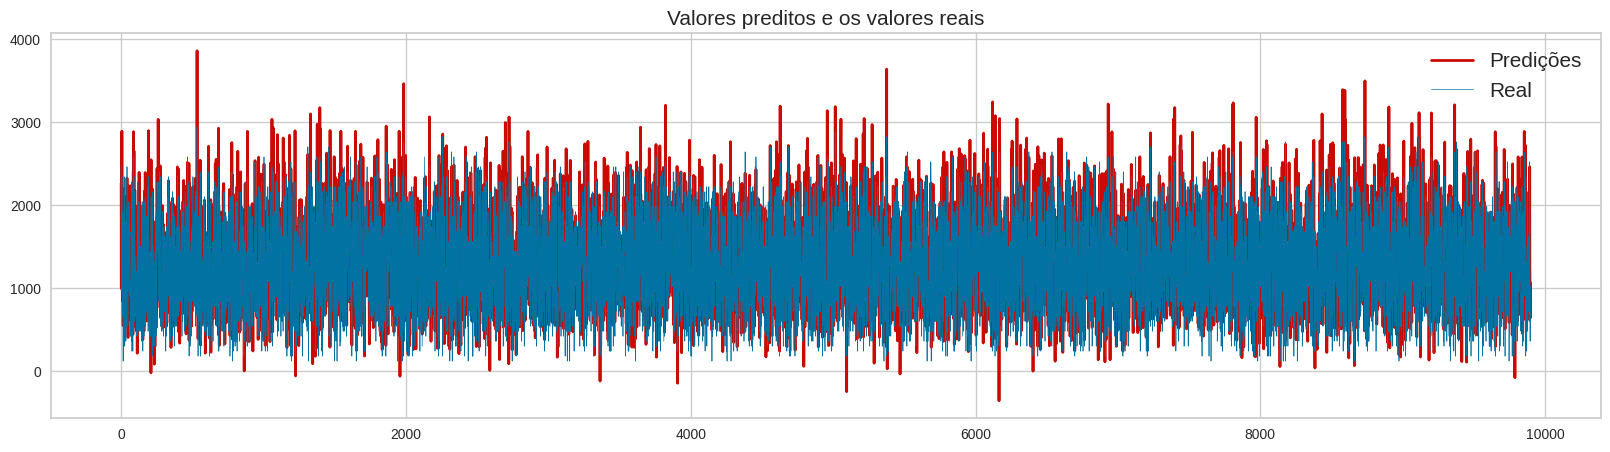

In [319]:
plt.figure(figsize=(20,5))
plt.plot(x, linewidth=2, color='r')
plt.plot(Y, linewidth=0.5,color='b')
plt.title('Valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

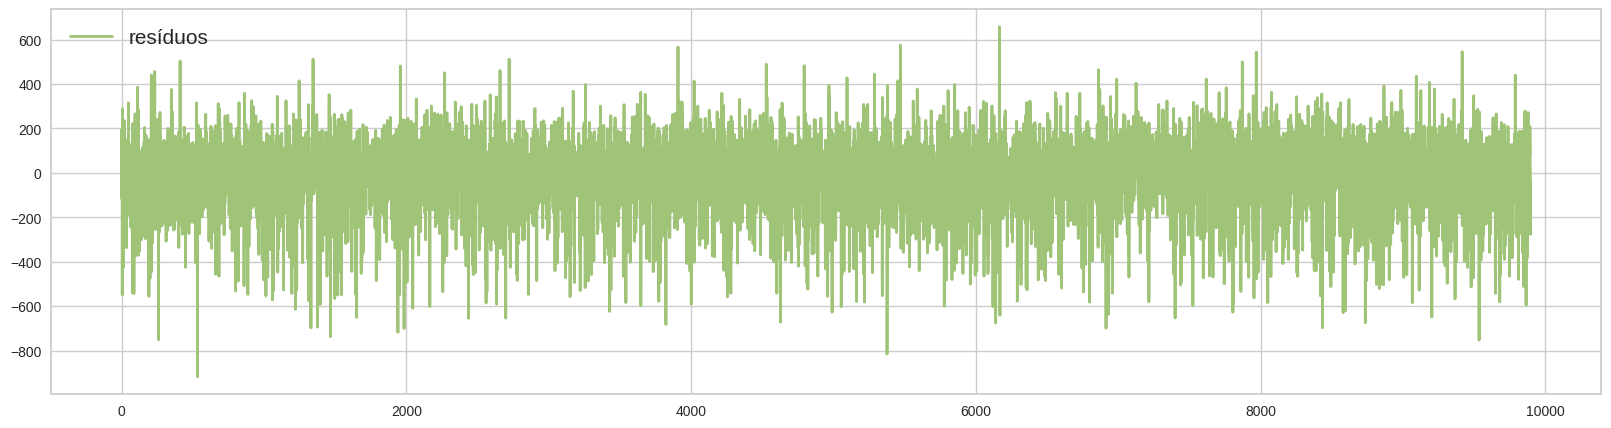

In [320]:
plt.figure(figsize=(20,5))
plt.plot(lm1['residuals'].tolist(), linewidth=2, color='g')
plt.legend(['resíduos'],fontsize=15)
plt.show()

<h4><b>Sem intecepto:</b></h4>

In [321]:
lm2 = pg.linear_regression(X, y, add_intercept=False, relimp=True).round(4)
lm2

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,x1,-5.9719,2.6748,-2.2326,0.0256,0.988,0.988,-11.2149,-0.7289,0.0017,0.1793
1,x2,4.6686,3.5316,1.3219,0.1862,0.988,0.988,-2.2539,11.5911,0.0017,0.1835
2,x3,-167.0125,26.5343,-6.2942,0.0000,0.988,0.988,-219.0239,-115.0011,0.0006,0.0668
3,x4,56.5753,26.3623,2.1461,0.0319,0.988,0.988,4.9010,108.2496,0.0012,0.1347
4,x5,-36.0888,26.6247,-1.3555,0.1753,0.988,0.988,-88.2773,16.0997,0.0023,0.2474
5,x6,22.5340,26.3186,0.8562,0.3919,0.988,0.988,-29.0546,74.1227,0.0020,0.2161
6,x7,0.0988,0.0003,348.1621,0.0000,0.988,0.988,0.0983,0.0994,0.7565,82.1633
7,x8,-36.4012,0.2216,-164.2943,0.0000,0.988,0.988,-36.8355,-35.9669,0.1548,16.8089


In [322]:
lm2 = pg.linear_regression(X, y, add_intercept=False, relimp=True, as_dataframe=False)
print(lm2['df_model'])
print(lm2['df_resid'])

8
12364


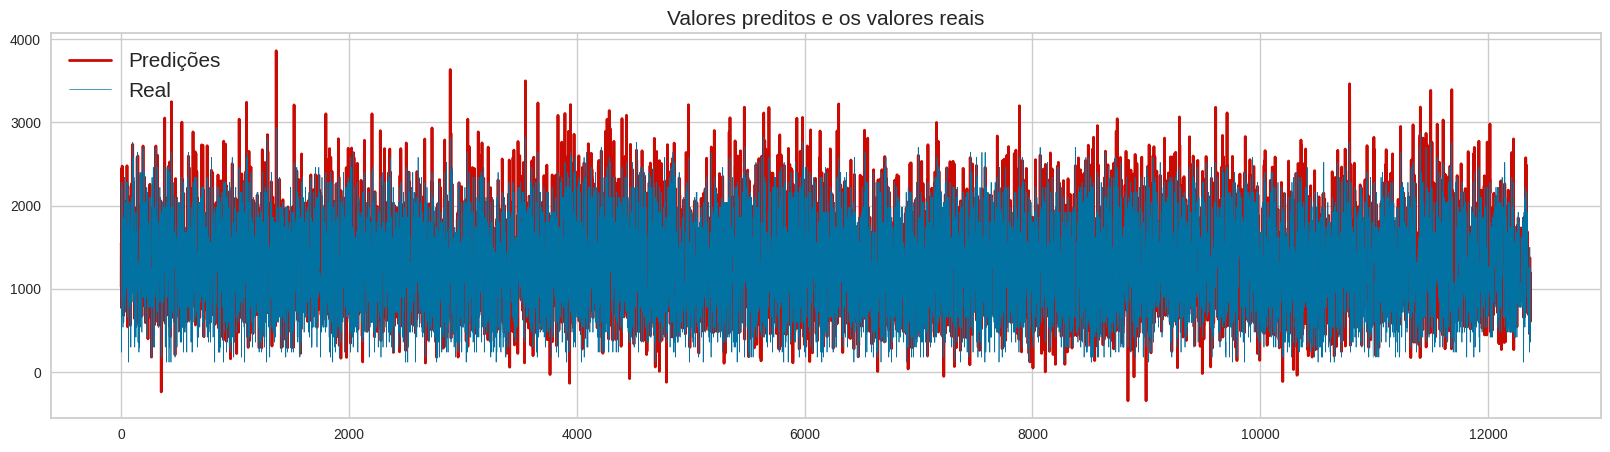

In [323]:
x2 = lm2['pred'].tolist()
Y2 = y.tolist()

plt.figure(figsize=(20,5))
plt.plot(x2, linewidth=2, color='r')
plt.plot(Y2, linewidth=0.5,color='b')
plt.title('Valores preditos e os valores reais',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

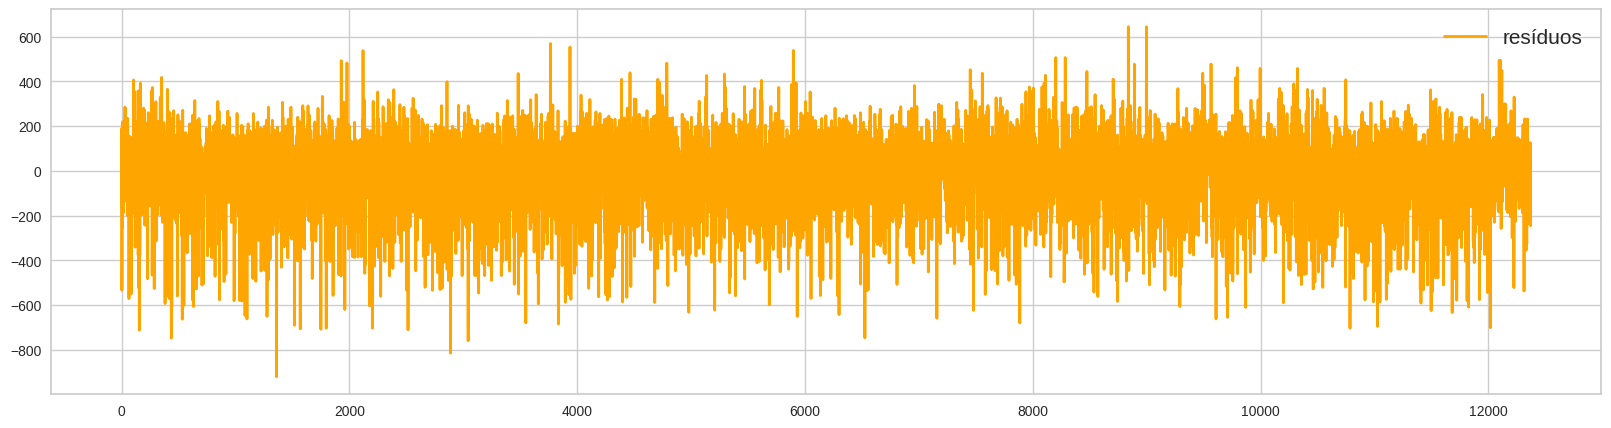

In [324]:
plt.figure(figsize=(20,5))
plt.plot(lm2['residuals'].tolist(), linewidth=2, color='orange')
plt.legend(['resíduos'],fontsize=15)
plt.show()

In [325]:
import statsmodels.api as sm

modelo1 = (sm.OLS(y_train,sm.add_constant(X_train)).fit())
modelo1.summary(title='Sumário do modelo com intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Sumário do modelo com intercepto                       
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 1.441e+04
Date:                Mon, 06 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:09:54   Log-Likelihood:                -63846.
No. Observations:                9897   AIC:                         1.277e+05
Df Residuals:                    9888   BIC:                         1.278e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3838.7407   2730.376     -1.406      0.160   -9190.834    1513.353
x1            -6.3011      3.006     -2.096      0.036     -12.194      -0.408
x2             5.1289      3.963      1.294      0.196      -2.640      12.898
x3          -169.0082     30.043     -5.626      0.000    -227.898    -110.118
x4            23.2613     38.730      0.601      0.548     -52.658      99.181
x5           -57.8439     30.224     -1.914      0.056    -117.088       1.401
x6            -9.9688     38.549     -0.259      0.796     -85.533      65.595
x7             0.0990      0.000    308.533      0.000       0.098       0.100
x8           -36.7404      0.257   -142.748      0.000     -37.245     -36.236
==============================================================================
Omnibus:                     1895.908   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4595.463
Skew:                          -1.069   Prob(JB):                         0.00
Kurtosis:                       5.564   Cond. No.                     2.58e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
modelo2 = sm.OLS(y_train,X_train).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo sem intercepto                           
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          1.017e+05
Date:                Mon, 06 Jan 2025   Prob (F-statistic):                        0.00
Time:                        13:09:58   Log-Likelihood:                         -63847.
No. Observations:                9897   AIC:                                  1.277e+05
Df Residuals:                    9889   BIC:                                  1.278e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.4476      3.005     -2.146      0.032     -12.337      -0.558
x2             5.2917      3.962      1.336      0.182      -2.474      13.057
x3          -162.0102     29.629     -5.468      0.000    -220.089    -103.931
x4            58.6143     29.459      1.990      0.047       0.869     116.360
x5           -50.3434     29.751     -1.692      0.091    -108.661       7.974
x6            25.1360     29.371      0.856      0.392     -32.438      82.710
x7             0.0989      0.000    311.562      0.000       0.098       0.100
x8           -36.6455      0.248   -147.532      0.000     -37.132     -36.159
==============================================================================
Omnibus:                     1894.069   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4601.587
Skew:                          -1.067   Prob(JB):                         0.00
Kurtosis:                       5.570   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [327]:
residuos1 = modelo1.resid
residuos2 = modelo2.resid

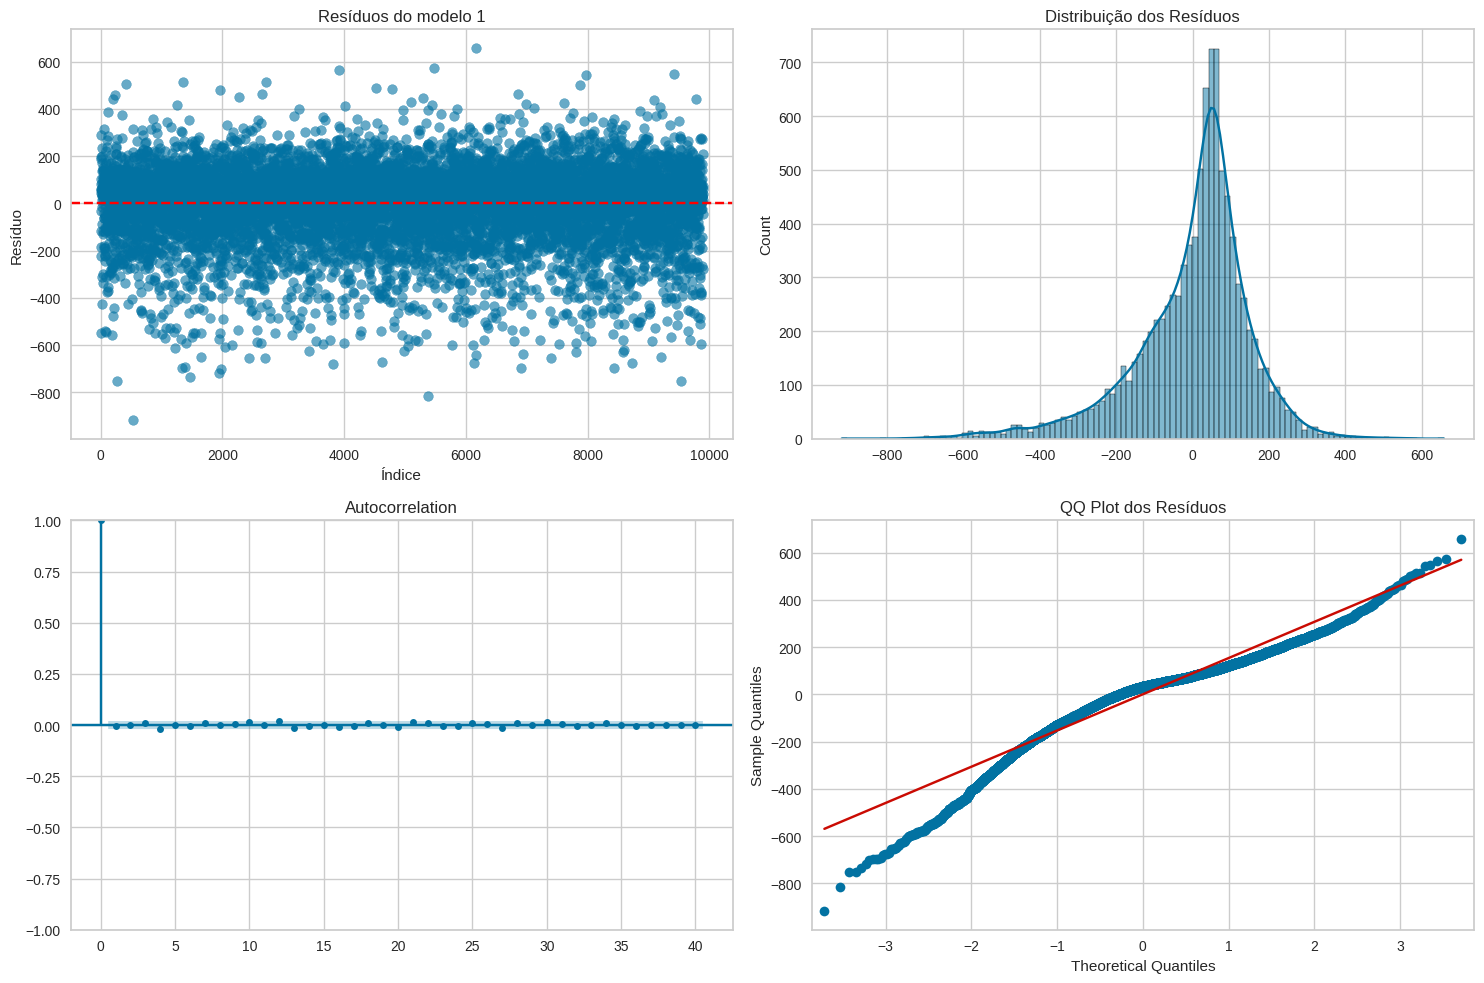

In [328]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de dispersão dos resíduos
ax[0][0].scatter(range(len(residuos1)), residuos1, alpha=0.6)
ax[0][0].axhline(y=0, color='red', linestyle='--')
ax[0][0].set_title("Resíduos do modelo 1")
ax[0][0].set_xlabel("Índice")
ax[0][0].set_ylabel("Resíduo")

# Distribuição dos resíduos (histograma)
sns.histplot(residuos1, kde=True, ax=ax[0][1])
ax[0][1].set_title("Distribuição dos Resíduos")

# Função de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos1, lags=40, ax=ax[1][0])

# QQ plot (gráfico de probabilidade normal)
sm.qqplot(residuos1, line='s', ax=ax[1][1])
ax[1][1].set_title("QQ Plot dos Resíduos")

plt.tight_layout()
plt.show()

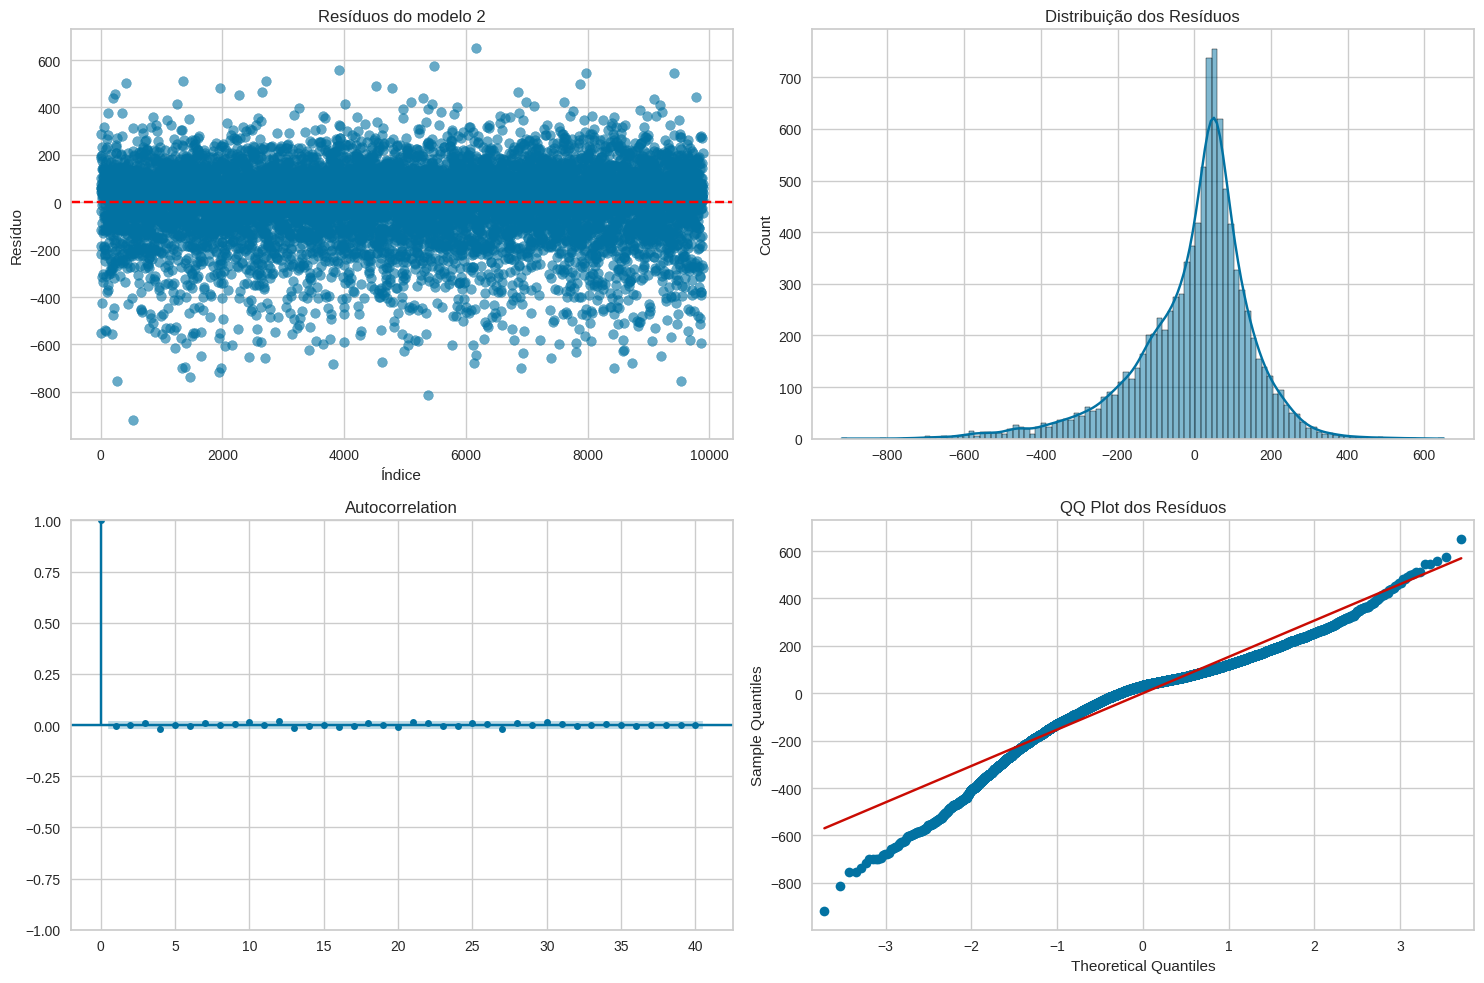

In [329]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de dispersão dos resíduos
ax[0][0].scatter(range(len(residuos2)), residuos2, alpha=0.6)
ax[0][0].axhline(y=0, color='red', linestyle='--')
ax[0][0].set_title("Resíduos do modelo 2")
ax[0][0].set_xlabel("Índice")
ax[0][0].set_ylabel("Resíduo")

# Distribuição dos resíduos (histograma)
sns.histplot(residuos2, kde=True, ax=ax[0][1])
ax[0][1].set_title("Distribuição dos Resíduos")

# Função de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos2, lags=40, ax=ax[1][0])

# QQ plot (gráfico de probabilidade normal)
sm.qqplot(residuos2, line='s', ax=ax[1][1])
ax[1][1].set_title("QQ Plot dos Resíduos")

plt.tight_layout()
plt.show()

<h4><b>Gerando previsões (base - test)</b></h4>

In [330]:
test_predicts = multiple_regressor.predict(X_test)
test_predicts

array([1010.16775195, 1212.58429287, 1461.8166057 , ...,  336.73169378,
       2107.17945213, 1644.601509  ])

<h4><b>Calculando Métricas de Erro</b></h4>

In [331]:
print('Metricas de erro - base treino')
mae_train = mean_absolute_error(y_train, train_predicts)
mse_train = mean_squared_error(y_train, train_predicts)
rmse_train = np.sqrt(mse_train)

print(f'MAE: {mae_train:.4f}')
print(f'MSE: {mse_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')

print('-'*80)

print('Metricas de erro - base teste')
mae_test = mean_absolute_error(y_test, test_predicts)
mse_test = mean_squared_error(y_test, test_predicts)
rmse_test = np.sqrt(mse_test)

print(f'MAE: {mae_test:.4f}')
print(f'MSE: {mse_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')

Metricas de erro - base treino
MAE: 111.9548
MSE: 23485.3171
RMSE: 153.2492
--------------------------------------------------------------------------------
Metricas de erro - base teste
MAE: 112.7249
MSE: 23224.2545
RMSE: 152.3951
